<a href="https://colab.research.google.com/github/Vivek-23-Titan/Crowd-Management-and-Detection/blob/master/Person_Detection_in_Crowd_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the YOLOv4 github repo

In [ ]:
!git clone https://github.com/Vivek-23-Titan/PyTorch_YOLOv4.git

Cloning into 'PyTorch_YOLOv4'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 156 (delta 14), reused 1 (delta 0), pack-reused 126
Receiving objects: 100% (156/156), 1.02 MiB | 2.37 MiB/s, done.
Resolving deltas: 100% (56/56), done.


# Link Drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Obtain the YOLOv4 weights

In [ ]:
#Copy the model weight file
%cd /content/drive/My Drive/YOLOv4/
%cp YOLOv4-pacsp.pt yolov4-pacsp.pt
%ls

#Move the copied YOLOv4 weight file
!mv yolov4-pacsp.pt /content/PyTorch_YOLOv4/weights

%cd /content/PyTorch_YOLOv4/weights
%ls
#yolov4-pacsp-x.pt

/content/drive/My Drive/YOLOv4
'Copy of yolov4-pacsp.pt'         yolov4-pacsp.pt
'Copy of yolov4-pacsp-x (1).pt'   YOLOv4-pacsp.pt
'Copy of yolov4-pacsp-x.pt'       YOLOv4-pacsp-x.pt
/content/PyTorch_YOLOv4/weights
'put your weights file here.txt'   yolov4-pacsp.pt


In [ ]:
%cd /content/PyTorch_YOLOv4/
!python3 detect.py #--weights weights/yolov4-pacsp-x.pt

/content/PyTorch_YOLOv4
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov4-pacsp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/yolov4-pacsp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 342 layers, 5.29214e+07 parameters, 5.29214e+07 gradients
image 1/2 data/samples/bus.jpg: 512x384 3 persons, 1 buss, 1 ties, Done. (0.084s)
image 2/2 data/samples/zidane.jpg: 320x512 2 persons, 3 ties, Done. (0.082s)
Results saved to /content/PyTorch_YOLOv4/output
Done. (0.717s)


## Obtain the dataset

In [ ]:
#Copy the Dataset zip file
%cd /content/drive/My Drive/Crowd_Control/Dataset and Paper/
%cp Copy_of_Five_ClassDataset.zip Five_ClassDataset.zip
%ls

#Move the copied dataset zip file
!mv Five_ClassDataset.zip /content/PyTorch_YOLOv4/data/samples

%cd /content/PyTorch_YOLOv4/data/samples
%ls

/content/drive/.shortcut-targets-by-id/1txhspqlWXxVHAc3K5WpgpvGwogLIEY-q/Dataset and Paper
 39.pf.doc
'Copy of Five_ClassDataset.zip'
 Copy_of_Five_ClassDataset.zip
'Copy_of_Five_ClassDataset.zip (Unzipped Files)'/
 Five_ClassDataset.zip
/content/PyTorch_YOLOv4/data/samples
bus.jpg  Five_ClassDataset.zip  zidane.jpg


In [ ]:
from zipfile import ZipFile
file_name = '/content/PyTorch_YOLOv4/data/samples/Five_ClassDataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
#Copy the data to samples folder
%cd /content/PyTorch_YOLOv4/data/samples/Dataset/Test/Test_VeryHigh/
%cp * /content/PyTorch_YOLOv4/data/samples

%cd /content/PyTorch_YOLOv4/data/samples/
#%ls

/content/PyTorch_YOLOv4/data/samples/Dataset/Test/Test_VeryHigh
/content/PyTorch_YOLOv4/data/samples


# Run YOLOv4 for object detection based on the COCO classes

In [ ]:
%cd /content/PyTorch_YOLOv4/
!python3 detect.py --conf-thres 0.2 #--iou-thres 0.5 #--conf-thres 0.2 --weights weights/yolov4-pacsp-x.pt

In [ ]:
#Clear the data and results if required to run again
!rm -rf /content/PyTorch_YOLOv4/output/*.jpg
!rm -rf /content/PyTorch_YOLOv4/data/samples/*.jpg

# Store and the display the results

In [ ]:
#Storing the video frames into an array
import glob
import cv2
import numpy as np


path = glob.glob(r"/content/PyTorch_YOLOv4/output/*.jpg")
pic = []

for img in path:
    n = cv2.imread(img)
    n = cv2.resize(n, (512, 256))
    pic.append(n)

pic = np.array(pic)
print(pic.shape)

(300, 256, 512, 3)


In [ ]:
#Bounding Box on Masked faces from the video frames

import matplotlib.pyplot as plt

for i in range(len(pic)):

  # load the photo and extract the face
  try:
      plt.rcParams["figure.figsize"] = (6,4)
      plt.imshow(cv2.cvtColor(pic[i], cv2.COLOR_BGR2RGB))
      plt.axis("off")
      plt.show()
      print("Frame:", i)
  except:
    continue

# Load and Open the Text File

In [ ]:
f = open('/content/VeryHigh_0.2.txt','r')
#print(f.read(49))
line = []
for lines in f:
  #line = f.readline()
  try:
    a = lines.index('persons')
    line.append(lines[a-3:a-1].lstrip())
  except:
    continue
f.close()
#line

In [ ]:
k5 = [int(j) for j in line]
print(sum(k)/len(k))

In [ ]:
d = {}
for key in k:
  d[key] = d.get(key, 0) + 1
print(sorted(d.items()))

[(1, 189), (2, 17), (3, 13), (4, 38), (5, 14), (6, 1)]


## Box Plot

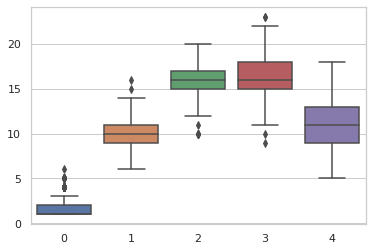

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.boxplot([k1, k2, k3, k4, k5])
ax = sns.boxplot(data=([k1, k2, k3, k4, k5]))
#ax = sns.boxplot(x="day", y="total_bill", data=({'VeryLow':k1, 'Low':k2, 'Moderate':k3, 'High':k4, 'VeryHigh':k5}))